In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [53]:
data=pd.read_csv(r"C:\Users\Lenovo\Downloads\wine.csv")

In [54]:
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [93]:
X=data.drop("Wine",axis=1)

In [94]:
X.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [95]:
X=X.iloc[0:,:].values
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [96]:
X.shape

(178, 13)

In [91]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [98]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xstd=sc.fit_transform(X)

In [103]:
pcax=pca.fit_transform(xstd)

In [104]:
pcax.shape

(178, 2)

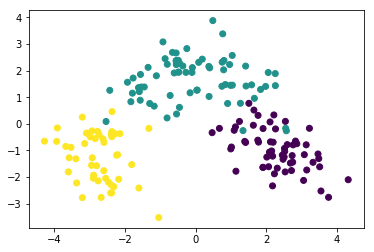

In [106]:
plt.scatter(pcax[0:,0],pcax[0:,1],c=data["Wine"])

In [84]:
XX=X[0:,[0,2,4,5,6,9,10,11,12]]

In [108]:
from sklearn.model_selection import train_test_split
xtrain2,xtest2,ytrain2,ytest2=train_test_split(pcax,Y,test_size=0.3,random_state=100)

In [109]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier()
dt1.fit(xtrain2,ytrain2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [85]:
XX

array([[1.423e+01, 2.430e+00, 1.270e+02, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 2.140e+00, 1.000e+02, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.670e+00, 1.010e+02, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 2.260e+00, 1.200e+02, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.370e+00, 1.200e+02, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 2.740e+00, 9.600e+01, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [110]:
ypred3=dt1.predict(xtest2)


In [111]:
print(classification_report(ytest,ypred3))
print(accuracy_score(ytest,ypred3))

             precision    recall  f1-score   support

          1       0.93      1.00      0.97        14
          2       0.86      0.95      0.90        19
          3       1.00      0.86      0.92        21

avg / total       0.93      0.93      0.93        54

0.9259259259259259


In [86]:
from sklearn.model_selection import train_test_split
xtrain1,xtest1,ytrain1,ytest1=train_test_split(XX,Y,test_size=0.3,random_state=100)

In [87]:
dt=DecisionTreeClassifier()
dt.fit(xtrain1,ytrain1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [88]:
ypred2=dt.predict(xtest1)

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
print(classification_report(ytest,ypred2))
print(accuracy_score(ytest,ypred2))

             precision    recall  f1-score   support

          1       0.88      1.00      0.93        14
          2       0.83      1.00      0.90        19
          3       1.00      0.71      0.83        21

avg / total       0.91      0.89      0.88        54

0.8888888888888888


In [9]:
Y=data["Wine"].values

In [10]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

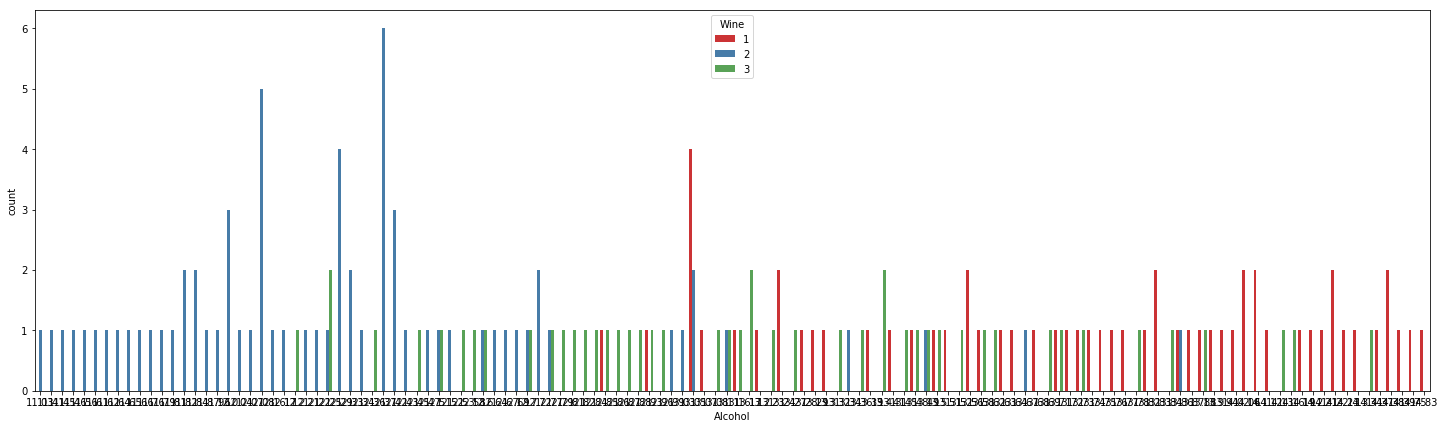

In [36]:
plt.figure(figsize=(25,7))
sns.countplot(x="Alcohol",hue="Wine",data=data,palette="Set1")

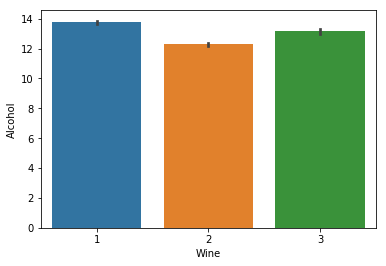

In [37]:
sns.barplot(x="Wine",y="Alcohol",data=data)

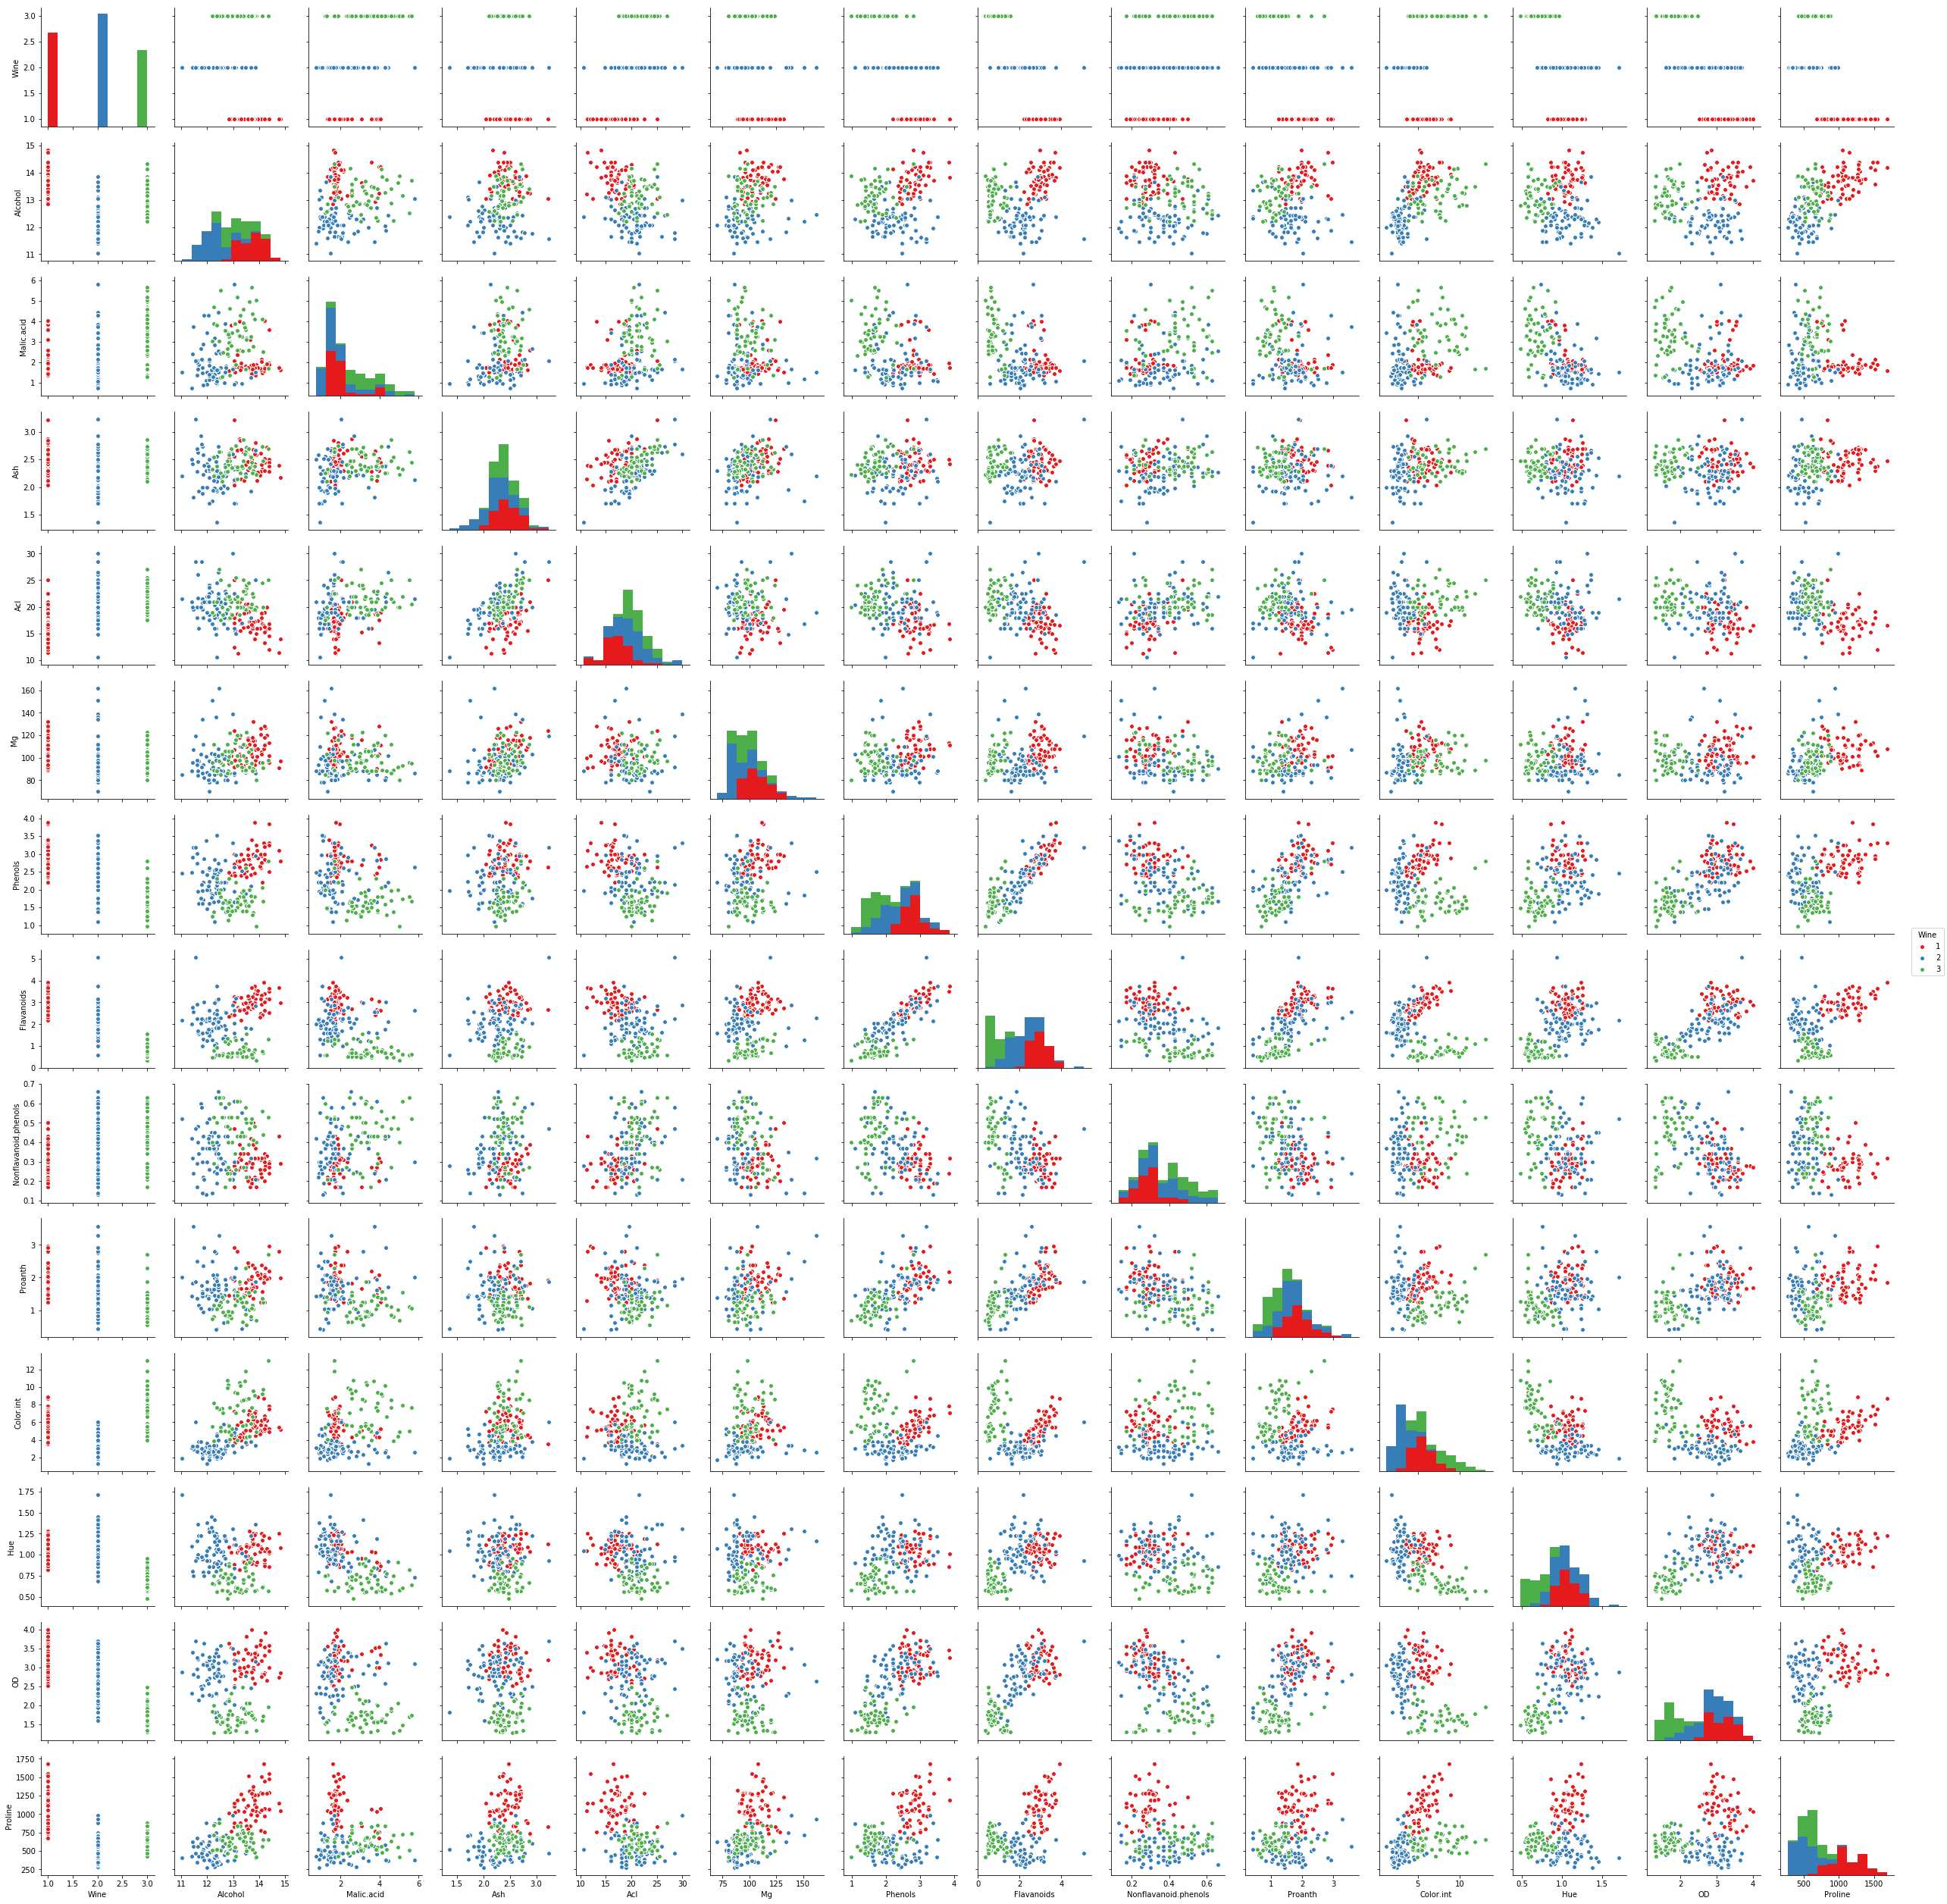

In [39]:
sns.pairplot(data,hue="Wine",palette="Set1")

In [61]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=100)

In [62]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [74]:
from sklearn.ensemble import ExtraTreesClassifier

model=ExtraTreesClassifier()
model.fit(xtrain,ytrain)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [75]:
model.feature_importances_

array([0.11678768, 0.02368216, 0.05797278, 0.04321368, 0.05081245,
       0.07137039, 0.09750444, 0.03519701, 0.04558318, 0.17681704,
       0.10732161, 0.05348482, 0.12025275])

In [32]:
X.shape[1]

13

In [29]:
ypred1=model.predict(xtest)


In [30]:
print(classification_report(ytest,ypred1))

             precision    recall  f1-score   support

          1       0.93      0.93      0.93        14
          2       0.80      0.84      0.82        19
          3       0.90      0.86      0.88        21

avg / total       0.87      0.87      0.87        54



In [63]:
ypred=dtree.predict(xtest)
ypred

array([2, 3, 1, 1, 2, 2, 2, 2, 2, 1, 3, 2, 3, 3, 3, 1, 3, 1, 2, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 3, 3, 2, 1, 2, 3, 2, 2, 2, 3, 3, 1, 2, 2, 3,
       1, 3, 3, 3, 1, 1, 1, 2, 1, 2], dtype=int64)

In [64]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest,ypred))
print(accuracy_score(ytest,ypred))

             precision    recall  f1-score   support

          1       0.88      1.00      0.93        14
          2       0.74      0.89      0.81        19
          3       1.00      0.71      0.83        21

avg / total       0.88      0.85      0.85        54

0.8518518518518519


In [15]:
print(confusion_matrix(ytest,ypred))

[[14  0  0]
 [ 2 15  2]
 [ 0  6 15]]


In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
rpred=rfc.predict(xtest)
rpred

array([2, 3, 1, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 1, 3, 1, 2, 1, 3, 1,
       2, 2, 1, 1, 2, 2, 2, 3, 3, 2, 1, 2, 3, 3, 2, 2, 3, 3, 1, 3, 3, 3,
       1, 3, 3, 3, 1, 1, 1, 2, 1, 2], dtype=int64)

In [18]:
print(confusion_matrix(ytest,rpred))

[[14  0  0]
 [ 0 19  0]
 [ 0  0 21]]


In [31]:
print(classification_report(ytest,rpred))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        14
          2       1.00      1.00      1.00        19
          3       1.00      1.00      1.00        21

avg / total       1.00      1.00      1.00        54



In [112]:
xtest.shape

(54, 13)

In [113]:
X.shape

(178, 13)

In [114]:
print("Done")

Done
